# The `analosis` package

**Author**: Natalie B. Hogg

The `analosis` (`analysis` + `los`) package allows us to perform various analyses of the line-of-sight effects using `lenstronomy` while maintaining the same settings across the board. 

**Warning**: in reality this means many parameter choices are hard-coded inside `analosis`. 

This notebook provides the interface with the `analosis` package, allowing you to choose what type of lensing scenario to analyse and to save the results to your machine.

In [15]:
# set the path to analosis relative to this notebook
import sys
sys.path.append('../..')

# import the Run class which allows you to run the analysis of your choice
from analosis.run import Run

### Cosmology
Choose the cosmological parameters which will be used by `lenstronomy`, `astropy` and `colossus` (for halo mass functions). The `id` must match one of those known to `colossus`: https://bdiemer.bitbucket.io/colossus/cosmology_cosmology.html#standard-cosmologies.

### Scenario
Choose the scenario you want to analyse.

Options:
* `composite lens`
* `distributed haloes`

### Complexity
Set the model complexity: you can choose to fit the generated image with a perfect model, a perfect minimal model, or a variety of incomplete minimal models. **This choice is only relevant for the composite lens**. It will be ignored if you run the distributed haloes scenario.

Options:
* `perfect`: fits the generated image with a model consisting of `main lens` + `halo` + `LOS`
* `perfect minimal`: fits the generated image with a model consisting of `main lens` + `halo`+ `LOS MINIMAL`
* `power law`: fits the generated image with a model consisting of `main lens`=`EPL` +  `LOS MINIMAL`
* `missing offset`: fits the generated image with a model consisting of `main lens` + `halo` + `LOS MINIMAL`, with the halo centre fixed to zero
* `missing halo ellipticity`: fits the generated image with a model consisting of `main lens` + `halo` + `LOS MINIMAL`, with the halo ellipticity fixed to zero
* `missing foreground shear`: fits the generated image with a model consisting of `main lens` + `halo` + `LOS MINIMAL`, with gamma_od fixed to zero

### Number of runs
Choose the number of runs you want to do i.e. how many images will be created and fit.

### Parameters
Other parameters.

In [21]:
cosmology = {'id': 'planck18', 'H0': 67.4, 'Om': 0.315}

settings = {'scenario': 'composite lens',
            'complexity': 'perfect minimal',
            'lens_light': False,
            'number_of_images': 2,
            'MCMC': True,
            'job_name': 'test',
            'n_burn': 5,
            'n_run': 10}

parameters = {'maximum_shear': 0.03,
              'Einstein_radius_min': 0.5, # arcsec
              'maximum_source_offset_factor': 1, # in units of the source half-light radius
              'sigma_halo_offset': 300} # pc

### Run
Finally, run the analysis. Note that you don't need to specify a path where you want your results to be saved: `analosis` automatically saves everything to a dedicated results directory. **Please don't push the contents of this directory to github!** (There is a .gitignore in place to prevent this, so you shouldn't have to worry about doing it accidentally).

In [22]:
result = Run(cosmology, settings, parameters)

Running the composite lens case with the following settings:

Model: perfect minimal
Number of images: 2
Lens light: False
Starting MCMC


INFO:lenstronomy.Sampling.Pool.pool:Running with MultiPool on 16 cores


100%|██████████| 15/15 [00:11<00:00,  1.31it/s]


Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  5
Sampling iterations (in current run): 15
11.868098974227905 time taken for MCMC sampling
the number of walkers in this chain is 220
Starting MCMC


INFO:lenstronomy.Sampling.Pool.pool:Running with MultiPool on 16 cores


100%|██████████| 15/15 [00:11<00:00,  1.32it/s]

Computing the MCMC...
Number of walkers =  220
Burn-in iterations:  5
Sampling iterations (in current run): 15
11.7503080368042 time taken for MCMC sampling
the number of walkers in this chain is 220

Analysis complete and results saved at /Users/pierrefleury/GitHub/analosis/analosis/results.


In [23]:
from analosis.analysis.plots import Plots
#path = result.pathfinder()
path = '/Users/pierrefleury/GitHub/analosis/analosis/results'
p = Plots(cosmology, path)

### Image plot

../../analosis/analysis/plots.py:74: RuntimeWarning: invalid value encountered in log10
  im = ax.matshow(np.log10(image_list[n]), origin='lower', vmin=v_min, vmax=v_max, cmap=cmap, extent=[0, 1, 0, 1])


Preparing image plot...


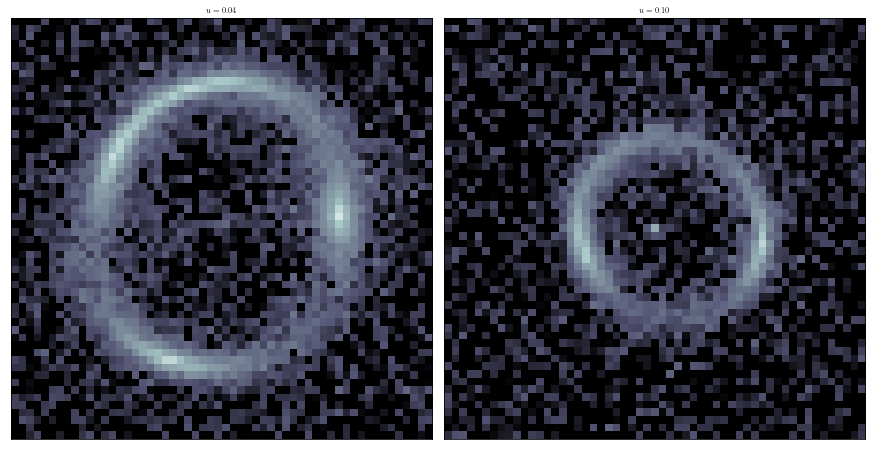

In [24]:
p.image_plot(path, settings, number_of_columns=2)

### Input vs output plot

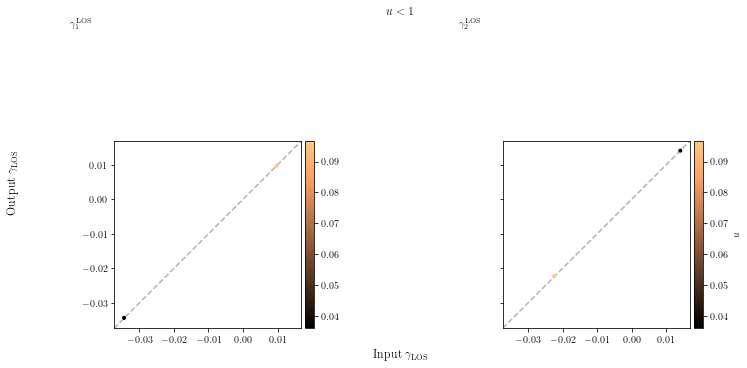

<Figure size 432x288 with 0 Axes>

In [25]:
p.input_output_plot(path, settings, show_not_converged=True)

### Individual contours

In [7]:
plot_params = {'gamma1_los', 'gamma2_los'}
p.contour_plot(path, settings, 4, plot_params, (6, 6), draft=True, save=False, show=True)

AttributeError: You must run the sampler with 'store == True' before accessing the results

### Examine input kwargs

In [8]:
import pandas as pd
in_kwargs = pd.read_csv(path + '/datasets/baseline_minimal_missing_ellipticity_no_ll_input_kwargs.csv')
in_kwargs

,kappa_os,gamma1_os,gamma2_os,omega_os,kappa_od,gamma1_od,gamma2_od,omega_od,kappa_ds,gamma1_ds,...,e1_sl,e2_sl,R_sersic_ll,n_sersic_ll,e1_ll,e2_ll,x_ll,y_ll,magnitude_ll,theta_E
0,0,0.006464,0.01456,0,0,0.007358,0.003739,0,0,0.027519,...,0.111812,-0.132401,0.229551,3.720934,-0.004909,0.008327,0.0,0.0,21.129431,0.872484


In [12]:
print(in_kwargs['gamma1_los'])
print(in_kwargs['gamma2_los'])

0   -0.013698
Name: gamma1_los, dtype: float64
0    0.0082
Name: gamma2_los, dtype: float64


In [9]:
out_kwargs = pd.read_csv(path + '/datasets/baseline_minimal_missing_ellipticity_no_ll_output_kwargs.csv')
out_kwargs

,gamma1_od,gamma2_od,gamma1_los,gamma2_los,omega_los
0,-0.016158,0.007597,-0.025737,0.008427,-0.00025


### Memo: baseline settings that were working

In [ ]:
settings = {'scenario': 'composite lens',
            'complexity': 'perfect minimal',
            'lens_light': False,
            'number_of_images': 100,
            'MCMC': True,
            'job_name': 'test',
            'n_burn': 1000,
            'n_run': 2000}

parameters = {'maximum_shear': 0.03,
              'Einstein_radius_min': 0.7, # arcsec
              'maximum_source_offset_factor': 1, # in units of the source half-light radius
              'sigma_halo_offset': 300} # pc